![PyData_logo](./static/pydata-logo-madrid-2016.png)

# Remove Before Flight
## Analyzing Flight Safety Data with Python

###### Jesús Martos Carrizo
###### Alejandro Sáez Mollejo

### Introduction

#### Some figures 

![passengers](./static/passenger.jpg)
###### by Ryan McGuire

####  Objective of this talk

#### Flight safety

##### Disclaimer

#### Some remarks about

![pandas-logo](./static/pandas_logo.png)

#### Data source

<img src="./static/ntsb.jpg" style="width: 150px;"/>

__National Transportation Safety Board__ is charged with determining the probable cause of transportation accidents and promoting transportation safety, and assisting victims of transportation accidents and their families.

Data: http://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx

### Loading & Cleaning data 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Some configuration options:
pd.set_option('max_columns', 70)
pd.set_option('max_rows', 50)

plt.style.use('ggplot')

##### A first glipse of the data: events

[Data base structure](./data/admsrel.pdf)

In [3]:
events = pd.read_csv("./data/events.csv", sep='|', low_memory=False)
events.head()

,ev_id,ntsb_no,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,ev_site_zipcode,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,...,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
0,20001208X07734,LAX97FA143,ACC,04/02/1997 12:00:00 AM,WE,2016,MST,GRAND CANYON,AZ,USA,86023,1997,4,N,N,,,NaN,,,OFAP,NaN,NaN,NaN,PARP,WFAC,1954,180,GCN,6606,21,MST,NDRK,SCAT,3600,...,BKN,"0,00000000e+00",0,"1,00000000e+01",-2,-3,0,U,0,CALM,N,0,"2,90000000e+01",NaN,UNK,NaN,FATL,0,0,0,2,NaN,NaN,NaN,2,N,1890,NaN,04/02/1997 12:00:00 AM,1922,IMAGE,12/08/2000 12:13:19 PM,dbo,IMC,NaN
1,20021008X05297,CHI02LA299,ACC,09/29/2002 12:00:00 AM,Su,2100,CDT,Moorhead,MN,USA,56560,2002,9,N,N,465021N,0963947W,NaN,Moorhead Municipal,JKJ,ONAP,NaN,NaN,917,UNK,WFAC,2053,47,FAR,908,9,BST,NDRK,CLER,NaN,...,OVC,NaN,NaN,"7,00000000e+00",14,12,160,Y,13,SPEC,Y,0,"2,97099991e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,1,NaN,1,2,N,13246,FAA,10/03/2002 12:00:00 AM,945,DMS,04/23/2003 12:26:44 PM,NTSB\\MONR,VMC,Minneapolis FSDO
2,20040127X00111,LAX04LA103,ACC,10/12/2003 12:00:00 AM,Su,1640,MST,Scottsdale,AZ,USA,85255,2003,10,N,N,333722N,1115438W,NaN,Scottsdale,SDL,ONAP,NaN,NaN,1510,FULL,WFAC,1653,NaN,KSDL,1510,NaN,MST,DAYL,CLER,NaN,...,NONE,NaN,NaN,"1,00000000e+01",33,12,NaN,NaN,NaN,CALM,N,NaN,"2,98899994e+01",NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,17586,FAA,01/22/2004 12:00:00 AM,1215,DMS,04/28/2005 02:59:26 PM,NTSB\\JOHB,VMC,WP-SDL-FSDO
3,20001213X34369,ANC86LA135,ACC,08/23/1986 12:00:00 AM,SA,1100,AKD,TALKEETNA,AK,USA,99676,1986,8,N,N,,,NaN,,,OFAP,"0,00000000e+00",0,0,UNK,PILO,0,0,,0,0,,DAYL,CLER,0,...,NONE,"0,00000000e+00",0,"5,00000000e+01",10,-18,0,U,0,UNK,U,0,NaN,NaN,UNK,NaN,NONE,0,0,0,NaN,NaN,3,NaN,NaN,N,891,NaN,08/23/1986 12:00:00 AM,1430,31238,01/02/2001 09:14:50 AM,dbo,VMC,NaN
4,20001213X35290,ANC87LA019,ACC,12/07/1986 12:00:00 AM,SU,1256,AST,SHAGELUK,AK,USA,99665,1986,12,N,N,,,NaN,,1,OFAP,"0,00000000e+00",0,0,UNK,PILO,0,0,,0,0,,DAYL,SCAT,1500,...,NONE,"0,00000000e+00",0,"4,00000000e+01",-1,-1,0,U,0,CALM,N,0,"2,90000000e+01",NaN,LGT,NaN,NONE,0,0,0,NaN,NaN,1,NaN,NaN,N,1400,NaN,12/07/1986 12:00:00 AM,1300,31791,01/02/2001 09:14:55 AM,dbo,VMC,NaN


In [4]:
events.describe()

,ev_time,ev_year,apt_dir,apt_elev,wx_obs_time,wx_obs_dir,wx_obs_elev,wx_obs_dist,sky_nonceil_ht,sky_ceil_ht,vis_rvv,wx_temp,wx_dew_pt,wind_dir_deg,wind_vel_kts,gust_kts,wx_dens_alt,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,ntsb_docket,ntsb_notf_tm
count,76535.000000,76848.000000,37020.000000,48146.000000,69909.000000,63990.000000,67552.000000,65299.000000,56454.000000,55382.000000,48754.000000,67043.000000,55773.000000,67986.000000,69080.000000,53729.000000,20314.000000,49522.000000,49526.000000,49513.000000,15253.000000,14347.000000,46273.000000,10793.000000,35217.000000,72695.000000,56995.000000
mean,1373.671196,1996.920427,49.827769,1055.010344,999.464661,103.528911,866.237728,11.339745,3255.918819,2930.506861,0.146039,19.850603,6.877970,161.884167,7.257426,3.650245,1772.910357,0.010157,0.013064,0.011209,2.813545,1.866732,7.574676,1.543037,2.451969,8586.409781,1043.181577
std,434.386422,101.770110,100.047186,1655.995540,720.507141,122.243560,3746.138486,30.473635,6264.894555,6349.779335,22.881972,17.341558,15.660181,117.043219,5.951389,10.485619,2706.629533,0.353946,0.393807,0.518030,11.025730,5.172820,31.982420,2.722736,8.733082,10805.425263,718.420703
min,0.000000,1948.000000,0.000000,-210.000000,0.000000,0.000000,-115.000000,0.000000,0.000000,0.000000,0.000000,-62.000000,-38.000000,0.000000,0.000000,0.000000,-30536.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1100.000000,1988.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,45.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,945.000000,1.000000
50%,1400.000000,1996.000000,0.000000,434.000000,1153.000000,40.000000,128.000000,1.000000,0.000000,0.000000,0.000000,21.000000,8.000000,170.000000,7.000000,0.000000,500.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2005.000000,1200.000000
75%,1700.000000,2005.000000,20.000000,1071.000000,1553.000000,200.000000,845.000000,16.000000,4000.000000,2700.000000,0.000000,27.000000,16.000000,260.000000,10.000000,0.000000,2370.750000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16468.500000,1600.000000
max,2400.000000,26733.000000,979.000000,13250.000000,2400.000000,360.000000,751635.000000,1526.000000,250000.000000,250000.000000,4444.000000,1652.000000,1646.000000,999.000000,210.000000,999.000000,26858.000000,44.000000,62.000000,71.000000,349.000000,380.000000,699.000000,111.000000,380.000000,34935.000000,2400.000000


In [5]:
events.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76880 entries, 0 to 76879
Data columns (total 71 columns):
ev_id                  76880 non-null object
ntsb_no                76852 non-null object
ev_type                76850 non-null object
ev_date                76849 non-null object
ev_dow                 76846 non-null object
ev_time                76535 non-null float64
ev_tmzn                76315 non-null object
ev_city                76792 non-null object
ev_state               73286 non-null object
ev_country             76356 non-null object
ev_site_zipcode        73857 non-null object
ev_year                76848 non-null float64
ev_month               76848 non-null object
mid_air                76103 non-null object
on_ground_collision    76121 non-null object
latitude               66492 non-null object
longitude              66495 non-null object
latlong_acq            10672 non-null object
apt_name               66518 non-null object
ev_nr_apt_id           66011 non-n

In [6]:
# Cleaning dates
date_format = "%m/%d/%Y %I:%M:%S %p"
date = events['ev_date'].dropna()
date = pd.to_datetime(date, format=date_format)
time = events['ev_time'].astype(str).str.split('.').str[0].str.zfill(4)
time = pd.to_datetime(time, format="%H%M", errors='coerce') # for nan values

time.fillna('0000', inplace=True)

str_date = date.dt.date.astype(str)
str_time = time.dt.time.astype(str)
date_time = pd.to_datetime(str_date + ' ' + str_time,
                           format="%Y-%m-%d %H:%M:%S")
events['ev_date'] = date_time

In [7]:
events.info(memory_usage='deep', max_cols=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76880 entries, 0 to 76879
Columns: 71 entries, ev_id to faa_dist_office
dtypes: datetime64[ns](1), float64(27), object(43)
memory usage: 204.7 MB


In [8]:
events.columns

Index(['ev_id', 'ntsb_no', 'ev_type', 'ev_date', 'ev_dow', 'ev_time',
       'ev_tmzn', 'ev_city', 'ev_state', 'ev_country', 'ev_site_zipcode',
       'ev_year', 'ev_month', 'mid_air', 'on_ground_collision', 'latitude',
       'longitude', 'latlong_acq', 'apt_name', 'ev_nr_apt_id', 'ev_nr_apt_loc',
       'apt_dist', 'apt_dir', 'apt_elev', 'wx_brief_comp', 'wx_src_iic',
       'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id', 'wx_obs_elev',
       'wx_obs_dist', 'wx_obs_tmzn', 'light_cond', 'sky_cond_nonceil',
       'sky_nonceil_ht', 'sky_ceil_ht', 'sky_cond_ceil', 'vis_rvr', 'vis_rvv',
       'vis_sm', 'wx_temp', 'wx_dew_pt', 'wind_dir_deg', 'wind_dir_ind',
       'wind_vel_kts', 'wind_vel_ind', 'gust_ind', 'gust_kts', 'altimeter',
       'wx_dens_alt', 'wx_int_precip', 'metar', 'ev_highest_injury',
       'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd', 'inj_tot_f', 'inj_tot_m',
       'inj_tot_n', 'inj_tot_s', 'inj_tot_t', 'invest_agy', 'ntsb_docket',
       'ntsb_notf_from', 'ntsb_notf_date'

In [9]:
events.drop(['ev_dow', 'ev_time', 'ev_tmzn', 'ev_year', 'ev_month'], axis=1, inplace=True)

Dropping events previuos to 1982 (They shouldn't be here!)

In [10]:
cond = events['ev_date'].dt.year < 1982
print('Dates before 1982: ',cond.sum())
indx = events[cond].index
events.drop(indx, inplace=True)

Dates before 1982:  6


In [11]:
events.memory_usage(deep=True).sum() / 1024

194231.5869140625

##### Discarding incidents 

In [12]:
gby_ev_type = events.groupby('ev_type')
gby_ev_type.groups.keys()

dict_keys(['INC', 'ACC'])

In [13]:
events = gby_ev_type.get_group('ACC')

In [14]:
events.count()

ev_id                  73887
ntsb_no                73887
ev_type                73887
ev_date                73887
ev_city                73847
ev_state               71023
ev_country             73431
ev_site_zipcode        71651
mid_air                73241
on_ground_collision    73250
latitude               64497
longitude              64500
latlong_acq            10339
apt_name               64173
ev_nr_apt_id           63709
ev_nr_apt_loc          70756
apt_dist               42332
apt_dir                35855
apt_elev               46566
wx_brief_comp          53788
wx_src_iic             72826
wx_obs_time            67735
wx_obs_dir             62146
wx_obs_fac_id          67803
wx_obs_elev            65497
                       ...  
gust_ind               69881
gust_kts               52020
altimeter              52891
wx_dens_alt            19717
wx_int_precip          47600
metar                   4422
ev_highest_injury      73677
inj_f_grnd             47906
inj_m_grnd    

##### Focus on commercial flights 

In [15]:
aircraft = pd.read_csv("./data/aircraft.csv",
                                    encoding = "ISO-8859-1",  # export the table again.
                                    sep=';',
                                    low_memory=False)

In [16]:
aircraft.head(2)

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20001204X00000,1,N6312H,ANC99FA021,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,207,207,20700478,3800,AIR,USUS,N,NaN,NaN,NaN,2,1,NaN,100H,16/12/1998,75,10286,Y,Y,U,NaN,"VILLAGE AVIATION, INC.",P.O.BOX 221188,...,N,N,BET,BETHEL,AK,NaN,1245,AST,SAME,NaN,NaN,NaN,NaN,560,NaN,NaN,02/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
1,20001204X00001,1,N481EV,ANC99IA025,N,121,IFR,NaN,MINR,GRD,NONE,Boeing,747-100,747-100,19896,750000,AIR,USUS,N,NaN,NaN,NaN,9,4,RETR,COAW,06/01/1999,113,26359,Y,U,U,NaN,"FIRST SECURITY BANK, NA",79 S. MAIN STREET,...,Y,N,RJCC,CHITOSE,JA,NaN,2159,AST,SAME,FAI,NaN,NaN,NaN,570,NaN,NaN,02/01/2001,dbo,NaN,1L,11800,150,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN


Aircrafts are classified according to different criteria (Model,Model of the engine,far_part,etc) in the NTSB database.

For this talk we are going to focus on revenue commercial Air Transport. In order to do this we are going to filter the data according to the FAA (Federal Aviation Administration) criteria: 

Part 121: Large transport aircraft engaged in revenue operations involving the transport of both passengers and cargo.

Part 135: Both scheduled (primarily passenger service) carriers flying aircraft with fewer than 10 passenger seats and on-demand passenger or cargo services using either fixed-wing airplanes or helicopters. On-demand passenger services include air taxi, air medical, and certain air tour operations.

Non US and commercial

In [17]:
events['ev_id'].count()

73887

In [18]:
aircraft['ev_id'].count()

77984

In [19]:
# are accidents
cond = aircraft['ev_id'].isin(events['ev_id'])

aircraft = aircraft[cond]

In [20]:
aircraft.count()
aircraft['Aircraft_Key'].value_counts()

1    73887
2      962
3       12
4        1
Name: Aircraft_Key, dtype: int64

In [21]:
gby_far_part = aircraft.groupby('far_part')
gby_far_part.groups.keys()

dict_keys(['437', 'UNK', 'PUBU', '135', '091', '125', '133', '103', '129', 'ARMF', 'NUSN', '121', '091K', '091F', 'NUSC', '137'])

In [22]:
desired_far_parts = ['NUSC',  # Non-U.S. Commercial
                     '121']      # Air Carrier
                    # '129',      # Foreign
                   # '091',      # General Aviation
                 #    'NUSN',  # Non-U.S. Non-Commercial
                   #  'UNK',     # Unknown
                     #'135']

<img src="./static/pict1.png" style="width:700px;"/>

In [23]:
cond = aircraft['far_part'].isin(desired_far_parts)
aircraft = aircraft[cond]

In [24]:
aircraft['acft_category'].value_counts()

AIR     1573
HELI     114
UNK        2
Name: acft_category, dtype: int64

In [25]:
cond_2 = aircraft['acft_category'] == 'AIR'
aircraft= aircraft[cond_2]
aircraft.head(2)

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
38,20001204X00044,1,N373AA,DCA99WA031,N,121,IFR,NaN,SUBS,UNK,UNK,Boeing,767-300,767-300,NaN,NaN,AIR,UNK,N,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,U,U,U,NaN,NaN,NaN,...,U,N,ORD,CHICAGO,IL,NaN,0,NaN,SAME,NaN,NaN,NaN,NaN,0,NaN,NaN,03/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
98,20001204X00105,1,N300ME,NYC99LA050,N,121,IFR,NaN,NONE,NONE,NONE,Douglas,DC-9,DC-9,45718,90700,AIR,USUS,N,NaN,NaN,NaN,64,2,RETR,COAW,13/01/1999,15,65241,N,U,U,NaN,MIDWEST EXPRESS AIRLINES,4501 ABBOTT DRIVE,...,Y,N,MKE,MILWAUKEE,WI,NaN,1010,EST,NaN,PHL,PHILADELPHIA,PA,NaN,0,NaN,NaN,20/12/2002,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN


In [26]:
ev_ids_for_desired_criteria = aircraft['ev_id'].drop_duplicates()
ev_ids_for_desired_criteria.head()
ev_ids_for_desired_criteria.count()

1541

In [27]:
cond_3 = events['ev_id'].isin(ev_ids_for_desired_criteria)
events = events[cond_3]

In [28]:
#quitar columnas que no queramos 

aircraft

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
38,20001204X00044,1,N373AA,DCA99WA031,N,121,IFR,NaN,SUBS,UNK,UNK,Boeing,767-300,767-300,NaN,NaN,AIR,UNK,N,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,U,U,U,NaN,NaN,NaN,...,U,N,ORD,CHICAGO,IL,NaN,0,NaN,SAME,NaN,NaN,NaN,NaN,0,NaN,NaN,03/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
98,20001204X00105,1,N300ME,NYC99LA050,N,121,IFR,NaN,NONE,NONE,NONE,Douglas,DC-9,DC-9,45718,90700,AIR,USUS,N,NaN,NaN,NaN,64,2,RETR,COAW,13/01/1999,15,65241,N,U,U,NaN,MIDWEST EXPRESS AIRLINES,4501 ABBOTT DRIVE,...,Y,N,MKE,MILWAUKEE,WI,NaN,1010,EST,NaN,PHL,PHILADELPHIA,PA,NaN,0,NaN,NaN,20/12/2002,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
102,20001204X00109,1,N785AT,NYC99LA235,N,121,UNK,NaN,NONE,NONE,NONE,Boeing,727-200,727-200,21691,194800,AIR,USUS,N,NaN,NaN,NaN,0,3,RETR,COAW,11/01/1999,NaN,51818,U,U,U,NaN,COMERICA LEASING CORP,"29201 TELEGRAPH RD, FLOOR 2",...,Y,Y,LGA,NaN,NaN,NaN,0,NaN,LOCL,NaN,NaN,NaN,NaN,500,NaN,NaN,20/12/2002,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
115,20001205X00124,1,N433AA,ATL99LA049,N,121,IFR,NaN,NONE,NONE,NONE,McDonnell Douglas,MD-80,MD-80,49451,160000,AIR,USUS,N,NaN,NaN,NaN,138,2,RETR,COAW,NaN,NaN,NaN,Y,N,N,NaN,AMERICAN AIRLINES,4333 AMON CARTER BLVD,...,Y,N,ORD,CHIGAGO,IL,NaN,1618,CDT,NaN,RDU,RALEIGH,NC,NaN,0,NaN,NaN,27/04/2001,dbo,NaN,23R,10000,150,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
122,20001205X00131,1,N148SK,CHI99LA085,N,121,IFR,NaN,SUBS,NONE,NONE,Beech,1900D,1900D,UE148,16950,AIR,USUS,N,NaN,NaN,NaN,21,2,RETR,COAW,04/02/1999,20,8899,Y,N,U,NaN,"ASTRAL AVIATION, INC.",1190 W. RAWSON AVE.,...,Y,N,GRR,GRAND RAPIDS,MI,NaN,1053,CST,SAME,MKE,NaN,NaN,NaN,560,NaN,NaN,22/04/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
135,20001205X00149,1,N586UA,DEN99LA037,N,121,IFR,NaN,NONE,NONE,NONE,Boeing,757-222,757-222,26710,260000,AIR,USUS,N,NaN,NaN,NaN,214,2,RETR,COAW,06/03/1998,3330,19634,U,U,U,NaN,UNITED AIR LINES INC.,1200 ALGONGUIN,...,N,N,DEN,DENVER,CO,NaN,759,MST,NaN,SNA,SANTA ANA,CA,NaN,540,NaN,NaN,02/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
169,20001205X00183,1,N640AW,LAX99LA087,N,121,IFR,NaN,NONE,NONE,NONE,Airbus Industrie,A-320-232,A320-232,448,169000,AIR,USUS,N,NaN,NaN,NaN,156,2,RETR,COAW,24/12/1998,480,18554,Y,N,U,NaN,"ACG ACQUISITION, LLC",46 SOUTHFIELD AVENUE,...,Y,N,TPA,TAMPA,FL,NaN,640,EST,SAME,LAS,NaN,NaN,NaN,0,NaN,NaN,28/09/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
219,20001205X00234,1,N682DA,NYC99LA064,N,121,IFR,NaN,SUBS,NONE,NONE,Boeing,757,757,26958,232000,AIR,USUS,N,NaN,NaN,NaN,191,2,RETR,COAW,NaN,NaN,NaN,Y,U,U,NaN,DELTA AIR LINES,1020 DELTA BLVD,...,Y,Y,CVG,NaN,KY,NaN,1455,EST,NaN,DCA,WASHINGTON,DC,NaN,520,NaN,NaN,02/01/2001,dbo,NaN,18L,10000,150,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
256,20001205X00272,1,N195US,CHI99FA102,N,121,IFR,NaN,SUBS,NONE,NONE,Douglas,DC-9-15F,DC-9-15F,47017,91700,AIR,USUS,N,NaN,NaN,NaN,5,2,RETR,COAW,04/02/1999,48,2725,N,U,U,NaN,"USA JET AIRLINES, INC.","HANGAR 2064, D S

In [54]:
mask = events['ev_id'].isin(ev_ids_for_desired_far.values)
events = events[mask]
events.head()

,ev_id,ntsb_no,ev_type,ev_date,ev_city,ev_state,ev_country,ev_site_zipcode,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,sky_ceil_ht,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
40,20140507X51410,DCA14CA090,ACC,2014-03-04 23:00:00,San Diego,CA,USA,92101,N,N,324406N,1171123W,NaN,San Diego International,SAN,ONAP,"0,00000000e+00",NaN,17,NaN,UNK,651,NaN,SAN,NaN,NaN,UTC,DAYL,FEW,NaN,NaN,NONE,NaN,NaN,"1,00000000e+01",15,11,20,Y,3,SPEC,N,NaN,"3,00799999e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,NaN,186,1,1,N,NaN,Delta Air Lines Flight Safety,NaN,NaN,NaN,09/10/2015 04:49:58 PM,lovj,VMC,NaN
56,20050825X01307,DCA05RA088,ACC,2005-08-02 16:00:00,Toronto,NaN,CA,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,309,NaN,NaN,O,NaN,TSB,NaN,NaN,NaN,11/04/2005 02:15:07 PM,NTSB\\JOHB,NaN,NaN
92,20041013X01621,DCA04WA083,ACC,2004-08-30 00:01:00,Sydney,NaN,AS,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,O,NaN,ATSB,NaN,NaN,NaN,10/13/2004 04:08:28 PM,HAUT,NaN,NaN
142,20030314X00332,ATL03LA056,ACC,2003-03-08 10:27:00,Kinston,NC,USA,28504,N,Y,351941N,0773655w,NaN,Kinston Regional Jetport,ISO,ONAP,"0,00000000e+00",0,94,UNK,WFAC,950,0,ISO,94,0,EST,DAYL,SCAT,NaN,NaN,NONE,NaN,NaN,"4,00000000e+00",9,2,60,Y,5,SPEC,Y,0,"3,02399998e+01",-890,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,N,15815,FAA Communication Center,03/08/2003 12:00:00 AM,1616,DMS,07/29/2004 07:30:37 AM,NTSB\\MONR,VMC,Columbia FSDO
211,20141227X82857,ERA15WA082,ACC,2014-12-24 19:50:00,Piedecuesta,NaN,CO,NaN,N,N,065921N,0730245W,EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WFAC,2000,315,SKBG,NaN,12,UTC,NaN,SCAT,1700,NaN,NaN,NaN,NaN,"6,00000000e+00",26,17,330,NaN,8,SPEC,N,NaN,"2,98799992e+01",NaN,NaN,METAR SKBG 242000Z 33008KT 9999 SCT017 26/17 A...,FATL,NaN,NaN,NaN,7,NaN,NaN,NaN,7,O,NaN,NTSB ROC,NaN,NaN,NaN,03/30/2015 10:20:44 AM,kenj,UNK,NaN


In [29]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 40 to 76863
Data columns (total 66 columns):
ev_id                  1541 non-null object
ntsb_no                1541 non-null object
ev_type                1541 non-null object
ev_date                1541 non-null datetime64[ns]
ev_city                1537 non-null object
ev_state               977 non-null object
ev_country             1504 non-null object
ev_site_zipcode        1083 non-null object
mid_air                1479 non-null object
on_ground_collision    1492 non-null object
latitude               1031 non-null object
longitude              1032 non-null object
latlong_acq            191 non-null object
apt_name               1068 non-null object
ev_nr_apt_id           1052 non-null object
ev_nr_apt_loc          1159 non-null object
apt_dist               493 non-null object
apt_dir                356 non-null float64
apt_elev               636 non-null float64
wx_brief_comp          817 non-null object
wx_src_

In [30]:
aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 38 to 77979
Data columns (total 93 columns):
ev_id                      1573 non-null object
Aircraft_Key               1573 non-null int64
regis_no                   1138 non-null object
ntsb_no                    1573 non-null object
acft_missing               688 non-null object
far_part                   1573 non-null object
flt_plan_filed             1422 non-null object
flight_plan_activated      772 non-null object
damage                     1571 non-null object
acft_fire                  1314 non-null object
acft_expl                  1265 non-null object
acft_make                  1572 non-null object
acft_model                 1570 non-null object
acft_series                860 non-null object
acft_serial_no             1094 non-null object
cert_max_gr_wt             991 non-null float64
acft_category              1573 non-null object
acft_reg_cls               852 non-null object
homebuilt                  1520 

### Data Analysis 

From now on, `events` and `aircraft` only contain **accident** data from flights corresponding to **FAR parts** in desired_far_parts.

#### Where do accidents occur?

##### What information do we have about location? 

In [137]:
events[['ev_city', 'ev_state', 'ev_country', 'latitude', 'longitude']].head(10)

,ev_city,ev_state,ev_country,latitude,longitude
40,San Diego,CA,USA,324406N,1171123W
56,Toronto,NaN,CA,NaN,NaN
92,Sydney,NaN,AS,NaN,NaN
142,Kinston,NC,USA,351941N,0773655w
187,Anaco,NaN,VE,NaN,NaN
211,Piedecuesta,NaN,CO,065921N,0730245W
298,Bologna,NaN,IT,NaN,NaN
325,Madinah,NaN,SA,NaN,NaN
326,Region del Bio Bio,NaN,CI,365839S,0721951W
357,San Francisco,CA,USA,373708N,1222229W


##### So, let's parse it!

In [31]:
def convert_lat(string):
    degs = float(string[0:2])
    mins = float(string[2:4])
    secs = float(string[4:6])
    last = string[6].lower()
    if last == 's':
        factor = -1.0
    elif last == 'n':
        factor = 1.0
    else:
        raise ValueError("invalid hemisphere")
    return factor * (degs + mins / 60 + secs / 3600)

def convert_lon(string):
    degs = float(string[0:3])
    mins = float(string[3:5])
    secs = float(string[5:7])
    last = string[7].lower()
    if last == 'w':
        factor = -1.0
    elif last == 'e':
        factor = 1.0
    else:
        raise ValueError("invalid direction")
    return factor * (degs + mins / 60 + secs / 3600)

In [32]:
# Parsing latitude
events['latitude'] = events['latitude'].replace('       ', np.nan)
lat = events['latitude']
lat.dropna(inplace=True)

mask = lat.str.contains(r'^[0-9]{6}[NnSs]$')
events['latitude_num'] = lat[mask].apply(convert_lat)

# Parsing longitude
events['longitude'] = events['longitude'].replace('        ', np.nan)
lon = events['longitude']
lon.dropna(inplace=True)

mask = lon.str.contains(r'^[0-9]{7}[EeWw]$')
events['longitude_num'] = lon[mask].apply(convert_lon)

events[['longitude_num', 'latitude_num']].head()

,longitude_num,latitude_num
40,-117.189722,32.735000
56,NaN,NaN
92,NaN,NaN
142,-77.615278,35.328056
211,-73.045833,6.989167


##### Using Google Geocode API

 ![](./static/googlemaps.png)

Due to the limitation on the daily number of requests we will load data that have requested previously.

In [33]:
cond = events['longitude'].isnull() | events['latitude'].isnull()

events['ev_id'][cond].count()

1015

In [34]:
need_location = events.loc[cond][['ev_city', 'ev_country', 'ev_state', 'latitude', 'longitude']]
need_location.head()

,ev_city,ev_country,ev_state,latitude,longitude
56,Toronto,CA,NaN,NaN,NaN
92,Sydney,AS,NaN,NaN,NaN
298,Bologna,IT,NaN,NaN,NaN
325,Madinah,SA,NaN,NaN,NaN
442,SOUTH BEND,USA,IN,NaN,NaN


We use `need_location.csv` and generate ---> `have_location_part1.csv` & `have_location_part_2.csv`

In [35]:
have_location1 = pd.read_csv('./data/have_location_part1.csv', index_col='Unnamed: 0')
have_location2 = pd.read_csv('./data/have_location_part2.csv', index_col='Unnamed: 0')
have_location = pd.concat([have_location1, have_location2], axis=0)

events.loc[need_location.index, ['latitude_num']] = have_location['latitude']
events.loc[need_location.index, ['longitude_num']] = have_location['longitude']
events.loc[need_location.index, ['ev_city', 'ev_country', 'ev_state', 'latitude_num', 'longitude_num']].head()

,ev_city,ev_country,ev_state,latitude_num,longitude_num
56,Toronto,CA,NaN,43.653226,-79.383184
92,Sydney,AS,NaN,-33.972047,151.144325
298,Bologna,IT,NaN,44.494887,11.342616
325,Madinah,SA,NaN,24.524654,39.569184
442,SOUTH BEND,USA,IN,41.676354,-86.251990


##### and... plotting 

In [36]:
lon_ = events['longitude_num'].values
lat_ = events['latitude_num'].values

In [30]:
%matplotlib qt
from mpl_toolkits.basemap import Basemap

m1 = Basemap('mill',lon_0=0, lat_0=0)
m1.bluemarble()
m1.drawcoastlines()
m1.scatter(lon_, lat_, latlon=True, marker='.', color='r')

#####  Really gathered right? but... where are the airports?

In [31]:
header = ['name', 'city', 'country', 'lat', 'lon']
airports = pd.read_csv('./data/openflights/airports.dat', usecols=(1,2,3,6,7), names=header)
airports.head()

,name,city,country,lat,lon
0,Goroka,Goroka,Papua New Guinea,-6.081689,145.391881
1,Madang,Madang,Papua New Guinea,-5.207083,145.788700
2,Mount Hagen,Mount Hagen,Papua New Guinea,-5.826789,144.295861
3,Nadzab,Nadzab,Papua New Guinea,-6.569828,146.726242
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,-9.443383,147.220050


In [32]:
%matplotlib qt

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

ax[0].set_title('airports')
m1 = Basemap('mill',lon_0=0, lat_0=0, ax=ax[0])
m1.drawcoastlines()
m1.bluemarble()
x, y = m1(airports['lon'], airports['lat'])
# retocar para que se vea bien
m1.scatter(x, y, latlon=False, marker='.', color='g')

ax[1].set_title('accidents')
m2 = Basemap('mill',lon_0=0, lat_0=0, ax=ax[1])
m2.drawcoastlines()
m2.bluemarble()
m2.scatter(lon_, lat_, latlon=False, marker='.', color='r')

#### When do accidents occur? Which flight phase is safer?

<img src="./static/PED_phase_flight.jpg" style="width: 800px;"/>

In [138]:
occurrences = pd.read_csv("./data/Occurrences1.csv",
                                    sep=';')
occurrences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140332 entries, 0 to 140331
Data columns (total 8 columns):
ev_id              140332 non-null object
Aircraft_Key       140332 non-null int64
Occurrence_No      140332 non-null int64
Occurrence_Code    140332 non-null int64
Phase_of_Flight    140332 non-null int64
Altitude           140332 non-null int64
lchg_date          139681 non-null object
lchg_userid        137311 non-null object
dtypes: int64(5), object(3)
memory usage: 9.6+ MB


In [139]:
#far_121 = aircraft.where((aircraft['far_part']=='121') or (ircraft['far_part'] == '135'))           
                         # we make a DataFrame with the FAR type accidents we need
cond = aircraft['far_part'].isin(desired_far_parts)
ev_ids_for_desired_far = aircraft[cond]['ev_id'].drop_duplicates()

mask = events['ev_id'].isin(ev_ids_for_desired_far.values)
events = events[mask]

mask_2 = occurrences['ev_id'].isin(ev_ids_for_desired_far.values)
occurrences = occurrences[mask_2]
occurrences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2366 entries, 3 to 140324
Data columns (total 8 columns):
ev_id              2366 non-null object
Aircraft_Key       2366 non-null int64
Occurrence_No      2366 non-null int64
Occurrence_Code    2366 non-null int64
Phase_of_Flight    2366 non-null int64
Altitude           2366 non-null int64
lchg_date          2345 non-null object
lchg_userid        2283 non-null object
dtypes: int64(5), object(3)
memory usage: 166.4+ KB


<img src="./static/pict2.png" style="width:700px;"/>

In [140]:
occurrences['Phase_of_Flight'] = occurrences['Phase_of_Flight'].replace(to_replace=[501,502,503,504,505,511,512,513,514,
                                                                                    521,
                                                                                    522,523,
                                                                                    531,541,542,551,552,553,561,562,563,564,565,
                                                                                    566,567,567,568,
                                                                                    569,571,572,573,574,575,576,582,583,591,592],
                                                                        value=     [500,500,500,500,500,510,510,510,510,
                                                                                    520,520,520,
                                                                                    530,540,580,550,550,550,560,560,560,560,560,
                                                                                    560,560,560,560,
                                                                                    560,570,570,570,570,570,570,580,580,590,590])
occurrences['Phase_of_Flight'].value_counts()

570    468
520    363
540    342
510    287
550    228
500    221
560    214
530    195
580     22
600     17
610      7
590      1
0        1
Name: Phase_of_Flight, dtype: int64

In [141]:
#a = occurrences['ev_id'].isin(far_121['ev_id'])
#a_1 = events['ev_id'].isin(far_121['ev_id'])

In [142]:
#occurrences_1 = occurrences[a]
#events_1 = events[a_1]
#occurrences_1['Aircraft_Key'].value_counts()
#occurrences_1[occurrences['ev_id']=='20001214X36685']

In [143]:
#occurrences_1 = occurrences_1.drop_duplicates('ev_id')

In [144]:
occurrences_series = occurrences['Phase_of_Flight'].value_counts()
occurrences_series = occurrences_series[0:10]

phases_dict = {500:'STANDING',
             510:'TAKEOFF',
             520:'TAXI',
             530:'CLIMB',
             540:'CRUISE',
             550:'DESCENT',
             560:'APPROACH',
             570:'LANDING',
             580:'MANEUVERING',
             590:'HOVER',
             600:'OTHER',
             610:'UNKNOWN'}
            
occurrences_series = occurrences_series.rename_axis(phases_dict)

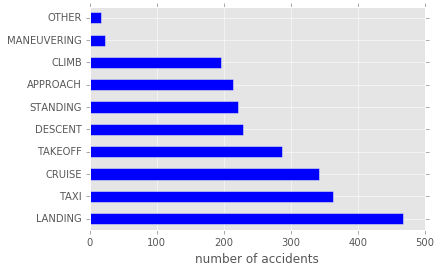

In [145]:
occurrences_series.plot.barh(stacked=True)
plt.xlabel('number of accidents')

In [110]:
occurrences = pd.read_csv("./data/Occurrences1.csv",
                                    sep=';')

aircraft_1 = aircraft
occurrences_1 = occurrences

#far_121 = aircraft.where(aircraft['far_part']=='121')  
#a = occurrences['ev_id'].isin(far_121['ev_id'])

landing = occurrences_1.where(occurrences_1['Phase_of_Flight'] == 570)    # occurrences for landing
aircraft_landing = aircraft_1['ev_id'].isin(landing['ev_id'])
aircraft_landing = aircraft_1[aircraft_landing]
landing_SUBS = aircraft_landing['damage'].value_counts().iloc[0]
landing_DEST = aircraft_landing['damage'].value_counts().iloc[1]
landing_MINR = aircraft_landing['damage'].value_counts().iloc[2]
landing_NONE = aircraft_landing['damage'].value_counts().iloc[3]

aircraft_2 = aircraft
occurrences_2 = occurrences

taxi = occurrences_2.where(occurrences_2['Phase_of_Flight'] == 520)    # occurrences for landing
aircraft_taxi = aircraft_2['ev_id'].isin(taxi['ev_id'])
aircraft_taxi = aircraft_2[aircraft_taxi]
#aircraft_taxi
#taxi_SUBS = aircraft_taxi['damage'].value_counts().iloc[0]
#taxi_DEST = aircraft_taxi['damage'].value_counts().iloc[1]
#taxi_MINR = aircraft_taxi['damage'].value_counts().iloc[2]
#taxi_NONE = aircraft_taxi['damage'].value_counts().iloc[3]

#### Which are the main accident causes?

In [97]:
occurrences['Occurrence_Code'] = occurrences['Occurrence_Code'].replace(to_replace=[131,171,172,191,192,193,195,232,271,351,352,
                                                                                    353,351,354],
                                                                        value=     [130,170,170,190,190,190,190,230,270,520,520,
                                                                                    350,350,350])

In [101]:
#a = occurrences['ev_id'].isin(far_121['ev_id'])
#a_1 = events['ev_id'].isin(far_121['ev_id'])

#occurrences_1 = occurrences[a]
#events_1 = events[a_1]

occurrences_series_2 = occurrences['Occurrence_Code'].value_counts()
occurrences_series_2 = occurrences_series_2[0:13]

In [104]:
Occurrences_dict = {130:'AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION',
                    170:'FIRE/EXPLOSION',
                    180:'FORCED LANDING',
                    190:'GEAR COLLAPSED',
                    220:'IN FLIGHT COLLISION WITH OBJECT',
                    230:'IN FLIGHT COLLISION WITH TERRAIN/WATER',
                    240:'IN FLIGHT ENCOUNTER WITH WEATHER',
                    250:'LOSS OF CONTROL - IN FLIGHT',
                    260:'LOSS OF CONTROL - ON GROUND/WATER',
                    280:'NEAR COLLISION BETWEEN AIRCRAFT',
                    310:'ON GROUND/WATER COLLISION WITH OBJECT',
                    320:'ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER',
                    340:'OVERRUN',
                    350:'LOSS OF ENGINE POWER',
                    430:'MISCELLANEOUS/OTHER',
                    520:'DESCENT'}
            
occurrences_series_2 = occurrences_series_2.rename_axis(Occurrences_dict)

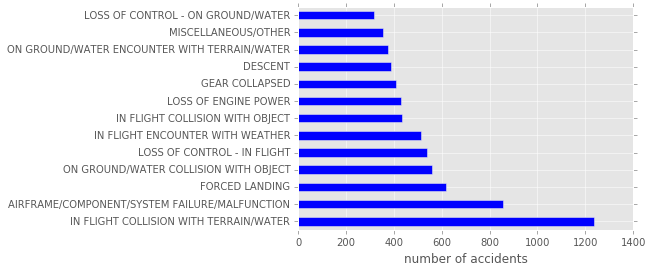

In [105]:
occurrences_series_2.plot.barh(stacked=True)
plt.xlabel('number of accidents')

#### What impact does experience have?

In [74]:
flight_crew = pd.read_csv('./data/flight_crew.csv')

# Only crew for the selected events:
flight_crew = flight_crew[flight_crew['ev_id'].isin(events['ev_id'])]
flight_crew.head(5)

,ev_id,Aircraft_Key,crew_no,crew_category,crew_age,crew_sex,crew_city,crew_res_state,crew_res_country,med_certf,med_crtf_vldty,date_lst_med,crew_rat_endorse,crew_inj_level,seatbelts_used,shldr_harn_used,crew_tox_perf,seat_occ_pic,pc_profession,bfr,bfr_date,ft_as_of,lchg_date,lchg_userid,seat_occ_row,infl_rest_inst,infl_rest_depl,child_restraint,med_crtf_limit,mr_faa_med_certf,pilot_flying,available_restraint,restraint_used
41,20140507X51410,1,1,PLT,53,NaN,Lexington,SC,USA,CL1,NaN,01/21/2014 12:00:00 AM,NaN,NONE,NaN,NaN,N,LEFT,Y,NaN,02/20/2014 12:00:00 AM,NaN,09/10/2015 05:10:53 PM,lovj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
42,20140507X51410,1,2,CPLT,43,NaN,Sandy,UT,USA,CL1,NaN,03/06/2013 12:00:00 AM,NaN,NONE,NaN,NaN,N,RGT,Y,NaN,NaN,NaN,09/10/2015 04:14:54 PM,lovj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
48,20001213X30836,1,1,PLT,40,M,DILLINGHAM,AK,NaN,CL1,VWW,02/07/1987 12:00:00 AM,N,NaN,Y,N,Y,LEFT,AM,Y,NaN,NaN,12/13/2000 02:22:27 PM,dbo,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
52,20001213X26058,1,1,PLT,33,M,CADYVILLE,NY,NaN,CL1,VWW,12/11/1987 12:00:00 AM,Y,NaN,Y,U,N,LEFT,PCIV,U,NaN,NaN,12/13/2000 11:51:24 AM,dbo,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
111,20140619X32751,1,1,PLT,45,NaN,Kihei,HI,USA,CL2,WOWL,08/27/2013 12:00:00 AM,NaN,NONE,NaN,NaN,N,RGT,Y,NaN,NaN,NaN,06/26/2014 04:49:41 PM,lewl,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [75]:
%matplotlib inline
# Remove spaces
flight_crew['crew_category'] = flight_crew['crew_category'].str.strip()

# Pilots and copilots
crew_cat = ['PLT', 'CPLT']
# crew_cat = ['PLT']
is_plt_cplt = flight_crew['crew_category'].isin(crew_cat)

In [76]:
flight_crew = flight_crew[is_plt_cplt]

flight_crew['crew_age'].describe()

count    4546.000000
mean       41.307523
std        11.333101
min        20.000000
25%        32.000000
50%        40.000000
75%        50.000000
max        78.000000
Name: crew_age, dtype: float64

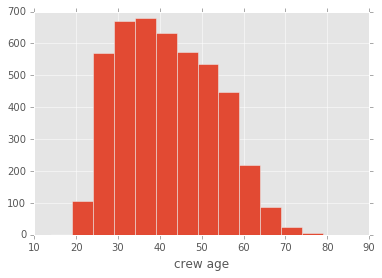

In [77]:
bins = np.arange(14,85,5)
flight_crew['crew_age'].hist(bins=bins)
plt.xlabel('crew age')

([<matplotlib.axis.XTick at 0x2514e8ce80>],
 <a list of 1 Text xticklabel objects>)

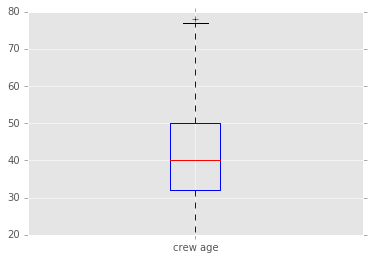

In [91]:
flight_crew['crew_age'].plot.box()
plt.xticks([1],['crew age'])

According to GAMMA databook:
    http://www.gama.aero/files/GAMA_2015_Databook_LoRes%20updated%203-29-2016.pdf
    http://www.gama.aero/media-center/industry-facts-and-statistics/statistical-databook-and-industry-outlook#year2015

In [129]:
licenses_by_age_commercial = np.array([262, 9621, 18564, 12848, 9132,
                                                                   8153, 7897, 9245, 10139, 10523,
                                                                   10420, 5151, 2732, 1604])

licenses_by_age_airline = np.array([0, 572, 5199, 12003, 15507,
                                                          18337, 23058, 25882, 24220, 16824,
                                                          10184, 4284, 1766, 787])

licenses_by_age = licenses_by_age_commercial + licenses_by_age_airline

# what page of the document are we using for this data?


In [130]:
age_group = pd.cut(flight_crew['crew_age'], bins)
gby_age = flight_crew['ev_id'].groupby(age_group).count()
gby_age

crew_age
(14, 19]      0
(19, 24]    190
(24, 29]    612
(29, 34]    694
(34, 39]    670
(39, 44]    597
(44, 49]    584
(49, 54]    514
(54, 59]    435
(59, 64]    162
(64, 69]     66
(69, 74]     18
(74, 79]      4
(79, 84]      0
dtype: int64

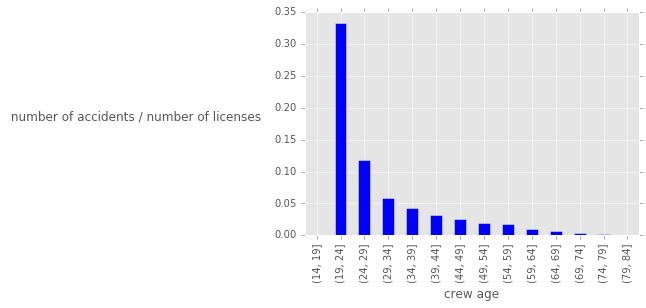

In [131]:
accident_rate_age_1 = gby_age / licenses_by_age_airline
accident_rate_age_1.plot.bar()
plt.ylabel(' number of accidents / number of licenses',labelpad= 140,rotation=0)
plt.xlabel('crew age')

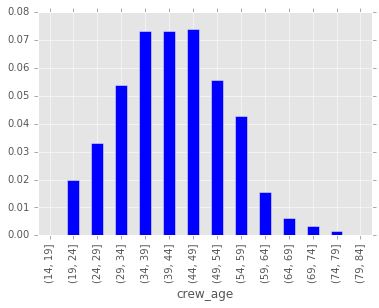

In [132]:
# Esta se quitará
accident_rate_age_2 = gby_age / licenses_by_age_commercial
accident_rate_age_2.plot.bar()

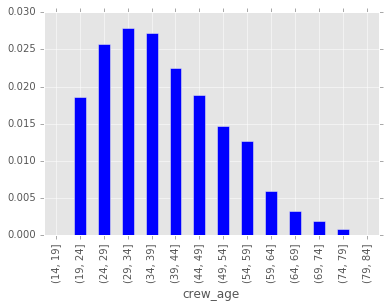

In [133]:
# Esta se quitará
accident_rate_age_3 = gby_age / licenses_by_age
accident_rate_age_3.plot.bar()

In [134]:
flight_time = pd.read_csv('./data/flight_time.csv', sep=';', usecols=(0,1,2,3,4,5))

In [135]:
flight_time.head()

,ev_id,Aircraft_Key,crew_no,flight_type,flight_craft,flight_hours
0,20001204X00000,1,1,L24H,ALL,6
1,20001204X00000,1,1,L30D,ALL,100
2,20001204X00000,1,1,L90D,ALL,238
3,20001204X00000,1,1,PIC,ALL,5230
4,20001204X00000,1,1,TOTL,ALL,5350


In [136]:
flight_time['flight_type'] = flight_time['flight_type'].str.split().str[0]
flight_time['flight_craft'] = flight_time['flight_craft'].str.split().str[0]

In [137]:
cond1 = flight_time['flight_type'] == 'TOTL'
flight_time = flight_time[cond1]
flight_time.head()

,ev_id,Aircraft_Key,crew_no,flight_type,flight_craft,flight_hours
4,20001204X00000,1,1,TOTL,ALL,5350
5,20001204X00000,1,1,TOTL,MAKE,1100
6,20001204X00000,1,1,TOTL,NGHT,500
7,20001204X00000,1,1,TOTL,SENG,5350
8,20001204X00000,1,1,TOTL,SIMU,50


In [138]:
cond2 = flight_time['flight_craft'].isin(['ALL', 'MAKE'])
flight_time = flight_time[cond2]
flight_time.head()

,ev_id,Aircraft_Key,crew_no,flight_type,flight_craft,flight_hours
4,20001204X00000,1,1,TOTL,ALL,5350
5,20001204X00000,1,1,TOTL,MAKE,1100
21,20001204X00001,1,1,TOTL,ALL,23000
22,20001204X00001,1,1,TOTL,MAKE,3000
47,20001204X00002,1,1,TOTL,ALL,10000


In [139]:
exp_in_acc_ac = flight_time.groupby('flight_craft').get_group('MAKE')
exp_in_acc_ac['flight_hours'].describe()

count     65459.000000
mean        945.199840
std       15236.880096
min           0.000000
25%          40.000000
50%         150.000000
75%         592.000000
max      999999.000000
Name: flight_hours, dtype: float64

In [140]:
idx_2_rm = exp_in_acc_ac[exp_in_acc_ac['flight_hours']>60000].index
exp_in_acc_ac = exp_in_acc_ac.drop(idx_2_rm)
exp_in_acc_ac.describe()

,Aircraft_Key,crew_no,flight_hours
count,65449.000000,65449.000000,65440.000000
mean,1.013262,1.044157,709.844778
std,0.116251,0.213182,1649.847967
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,40.000000
50%,1.000000,1.000000,150.000000
75%,1.000000,1.000000,590.000000
max,4.000000,5.000000,38200.000000


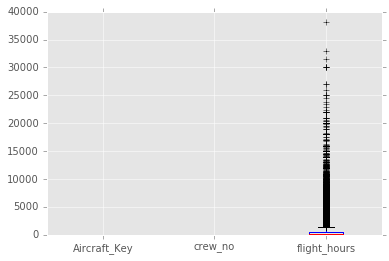

In [141]:
%matplotlib inline
exp_in_acc_ac.plot.box()

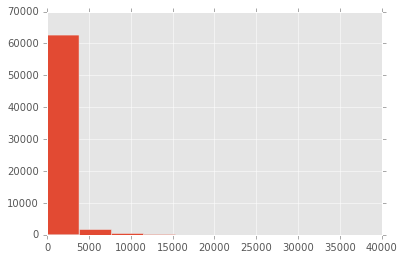

In [142]:
exp_in_acc_ac['flight_hours'].hist()


In [143]:
exp_total = flight_time.groupby('flight_craft').get_group('ALL')

In [144]:
idx_2_rm = exp_total[exp_total['flight_hours']==999999].index
idx_2_rm

Int64Index([1018057, 1018062, 1018494, 1065298], dtype='int64')

In [145]:
exp_total = exp_total.drop(idx_2_rm)
exp_total['flight_hours'].describe()

count     74099.000000
mean       3533.611578
std        5630.275036
min           0.000000
25%         305.000000
50%        1188.000000
75%        4200.000000
max      199334.000000
Name: flight_hours, dtype: float64

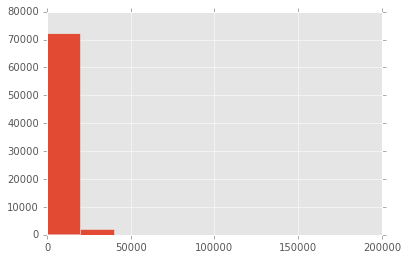

In [109]:
exp_total['flight_hours'].hist()

#### And finally... is commercial air transport safer now than 30 years ago?

In [102]:
ev_before_2016 = events[events['ev_date'].dt.year < 2016]
gby_year = events.groupby(ev_before_2016.ev_date.dt.year)

injured_per_year = gby_year[['inj_tot_f', 'inj_tot_s', 'inj_tot_m']].count()

#injured_per_year.index = np.arange(1982, 2016)
injured_per_year.head()

,inj_tot_f,inj_tot_s,inj_tot_m
ev_date,,,
1982,40,37,41
1983,34,32,47
1984,31,37,54
1985,49,37,52
1986,36,42,43


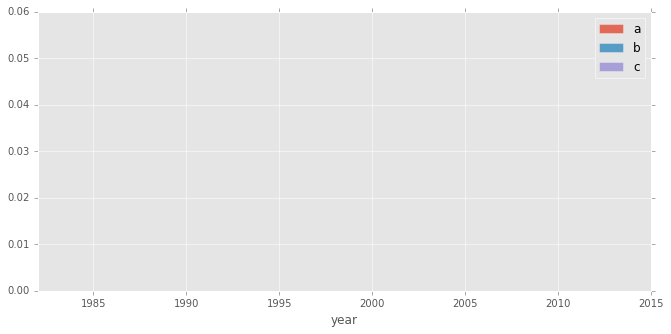

In [100]:
injured_per_year.plot.area(alpha=0.8, figsize=(11,5))
plt.xlabel('year')

In [112]:
passengers = pd.read_csv('./data/annual_passengers_carried/data.csv', nrows=1, usecols=range(4,60))
passengers = passengers.transpose()
# renaming column
passengers.columns = ['passengers']
passengers
# parsing date in index 
passengers.index = pd.to_datetime(passengers.index.str[:4])
# converting flight number to number
passengers['passengers'] = pd.to_numeric(passengers['passengers'], errors='coerce') / 1e6
passengers.index = passengers.index.year

In [113]:
flights = pd.read_csv('./data/annual_worldwide_departures/data.csv', nrows=1, usecols=range(4,59))
flights = flights.transpose()
# renaming column
flights.columns = ['flights']
flights
# parsing date in index 
flights.index = pd.to_datetime(flights.index.str[:4])
# converting flight number to number
flights['flights'] = pd.to_numeric(flights['flights'], errors='coerce') / 1e6

flights.index = np.arange(1960,2015)

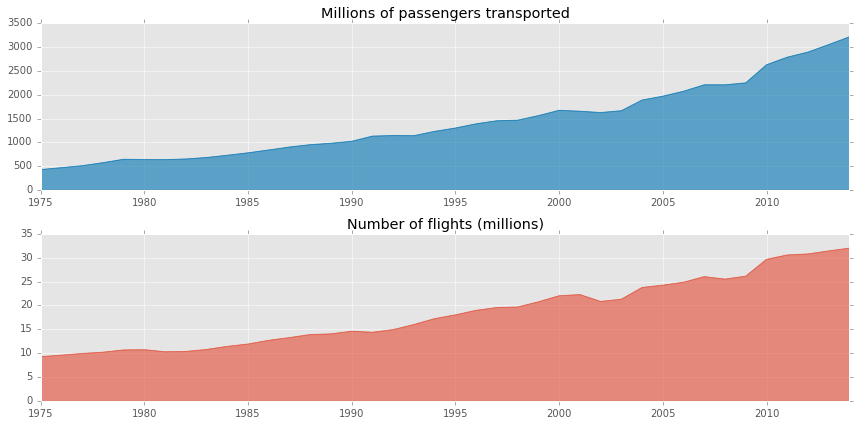

In [114]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].set_title('Millions of passengers transported')
passengers['passengers'].plot.area(ax=ax[0], alpha=0.6, color="#0072B2")
ax[0].set_xlim(1975, 2014)

ax[1].set_title('Number of flights (millions)')
flights['flights'].plot.area(ax=ax[1], alpha=0.6)
ax[1].set_xlim(1975, 2014)

plt.tight_layout()

(1982, 2015)

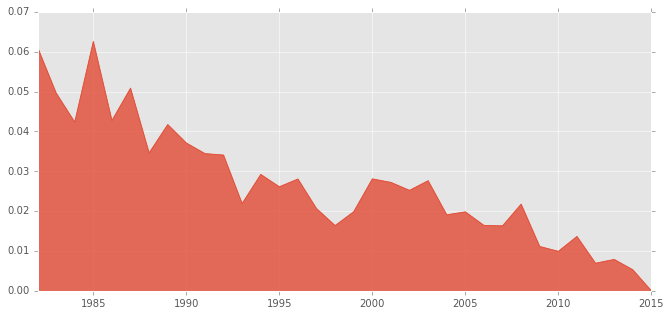

In [115]:
letality_rate = injured_per_year['inj_tot_f'] / passengers['passengers']
ax = letality_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2015)

(1982, 2015)

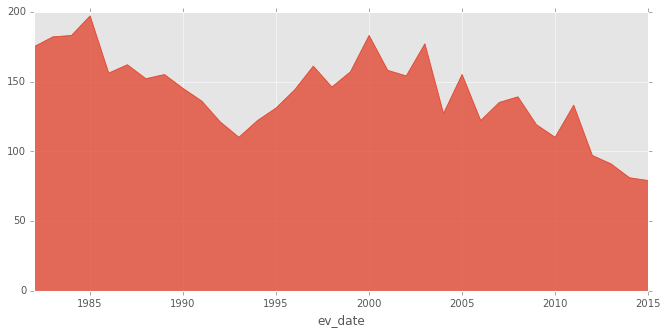

In [105]:
accidents_gby_year = events['ev_id'].groupby(events.ev_date.dt.year).count()
ax = accidents_gby_year.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2015)

In [117]:
accident_rate = accidents_gby_year / flights.flights
accident_rate.tail()

2012    3.152291
2013    2.897382
2014    2.531777
2015         NaN
2016         NaN
dtype: float64

(1982, 2014)

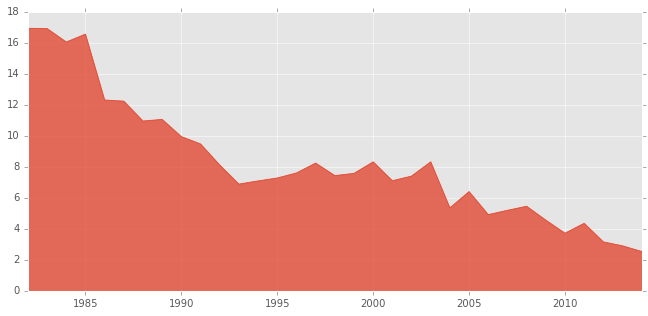

In [118]:
ax = accident_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2014)

#### Other Questions... 

### Conclusions 

# Thanks for yor attention! 

![PyData_logo](./static/pydata-logo-madrid-2016.png)

## Any Questions?


---


In [119]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())